In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("churn_prediction.csv")  


In [3]:
df

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,1,0.0,5,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,0,0.0,2,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,1,0.0,1,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,0,NaN,3,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,1,2.0,4,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,1,0.0,2,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,0,0.0,2,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,1,0.0,5,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,1,3.0,3,1219.0,3,274,NaN,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


In [4]:
X = df.drop('churn', axis=1)  # Assuming 'churn' is the column you want to predict
y = df['churn']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size as desired


In [14]:
df.dropna(inplace=True)


In [15]:
df

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,1,0.0,5,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
4,6,2531,42,1,2.0,4,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,0,0.0,3,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,8,5922,72,1,0.0,2,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
7,9,1145,46,1,0.0,4,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28375,30295,2041,42,1,0.0,1,146.0,2,286,57.0,...,6777.41,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0
28377,30297,1845,10,1,0.0,2,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,0,0.0,2,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,1,0.0,5,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1


In [16]:
print(df.isnull().sum())

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64


In [17]:
df.describe()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,22368.000000,22368.000000,22368.000000,22368.000000,22368.000000,22368.000000,22368.000000,22368.000000,22368.000000,22368.000000,...,2.236800e+04,2.236800e+04,22368.000000,2.236800e+04,2.236800e+04,2.236800e+04,2.236800e+04,2.236800e+04,2.236800e+04,22368.000000
mean,15118.405535,2543.842498,48.420422,0.503621,0.373078,2.494680,799.927620,2.209183,871.980418,67.241327,...,7.371987e+03,7.351151e+03,6772.095701,4.000412e+03,3.843470e+03,4.133887e+03,3.784083e+03,7.323646e+03,7.347169e+03,0.193804
std,8736.245763,1595.066092,16.898465,0.499998,1.038785,1.703058,431.320765,0.669789,902.227933,84.448743,...,2.492464e+04,2.406864e+04,18074.011103,8.621076e+04,3.293671e+04,5.716043e+04,2.578734e+04,2.346890e+04,2.533209e+04,0.395286
min,1.000000,180.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,-3.149570e+03,1.428690e+03,-16506.100000,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7534.750000,1323.750000,36.000000,0.000000,0.000000,1.000000,409.000000,2.000000,159.000000,11.000000,...,1.905053e+03,2.211370e+03,1819.467500,3.600000e-01,3.700000e-01,4.700000e-01,4.900000e-01,2.029653e+03,2.093935e+03,0.000000
50%,15120.500000,2200.000000,46.000000,1.000000,0.000000,2.000000,837.000000,2.000000,528.000000,28.000000,...,3.427305e+03,3.602255e+03,3390.655000,1.025000e+00,5.270000e+00,2.144650e+02,2.216350e+02,3.504760e+03,3.511510e+03,0.000000
75%,22685.250000,3359.000000,60.000000,1.000000,0.000000,4.000000,1096.000000,3.000000,1371.250000,90.000000,...,6.848077e+03,6.838818e+03,6651.310000,9.980275e+02,1.128940e+03,1.579972e+03,1.642225e+03,6.878090e+03,6.795062e+03,0.000000
max,30301.000000,11353.000000,90.000000,1.000000,52.000000,5.000000,1649.000000,3.000000,4782.000000,365.000000,...,1.435873e+06,1.608344e+06,856596.510000,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,1.435873e+06,1.572833e+06,1.000000


## Random Forest Classifier

Accuracy: 0.8562807331247206
Confusion Matrix:
[[3444  124]
 [ 519  387]]


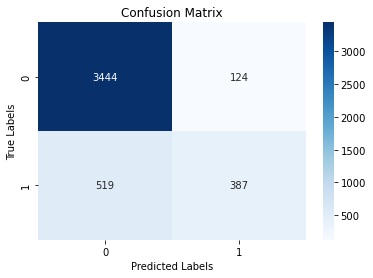

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("churn_prediction.csv")  # Replace "churn_dataset.csv" with the actual filename or path to your dataset

# Drop rows with missing values
df.dropna(inplace=True)

# Split the data into features (X) and target (y) variables
X = df.drop('churn', axis=1)
y = df['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
rf = RandomForestClassifier()

# Fit the classifier on the training data
rf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rf.predict(X_test)

# Calculate the accuracy score
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


## Naive Bayes Classifier

Accuracy: 0.784309342869915
Confusion Matrix:
[[3479   89]
 [ 876   30]]


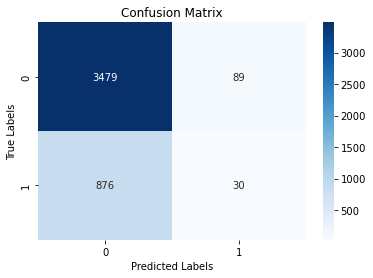

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("churn_prediction.csv")  # Replace "churn_dataset.csv" with the actual filename or path to your dataset

# Drop rows with missing values
df.dropna(inplace=True)

# Split the data into features (X) and target (y) variables
X = df.drop('churn', axis=1)
y = df['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
nb = GaussianNB()

# Fit the classifier on the training data
nb.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = nb.predict(X_test)

# Calculate the accuracy score
accuracy_nb = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_nb)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


## Logistic Regression

Accuracy: 0.8073312472060795
Confusion Matrix:
[[3535   33]
 [ 829   77]]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


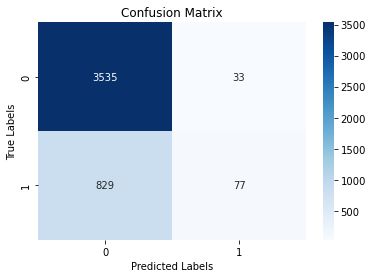

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("churn_prediction.csv")  # Replace "churn_dataset.csv" with the actual filename or path to your dataset

# Drop rows with missing values
df.dropna(inplace=True)

# Split the data into features (X) and target (y) variables
X = df.drop('churn', axis=1)
y = df['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
lr = LogisticRegression()

# Fit the classifier on the training data
lr.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = lr.predict(X_test)

# Calculate the accuracy score
accuracy_lr = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_lr)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


## Decision Tree Classifier

Accuracy: 0.7758158247653106
Confusion Matrix:
[[3077  491]
 [ 512  394]]


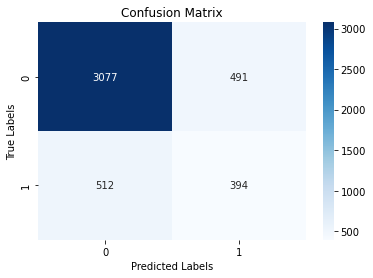

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("churn_prediction.csv")  # Replace "churn_dataset.csv" with the actual filename or path to your dataset

# Drop rows with missing values
df.dropna(inplace=True)

# Split the data into features (X) and target (y) variables
X = df.drop('churn', axis=1)
y = df['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
dt = DecisionTreeClassifier()

# Fit the classifier on the training data
dt.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = dt.predict(X_test)

# Calculate the accuracy score
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_dt)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


## KNN Classifier

Accuracy: 0.816495306213679
Confusion Matrix:
[[3389  179]
 [ 642  264]]


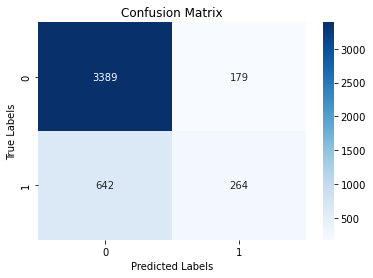

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("churn_prediction.csv")  # Replace "churn_dataset.csv" with the actual filename or path to your dataset

# Drop rows with missing values
df.dropna(inplace=True)

# Split the data into features (X) and target (y) variables
X = df.drop('churn', axis=1)
y = df['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
knn = KNeighborsClassifier()

# Fit the classifier on the training data
knn.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy score
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_knn)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


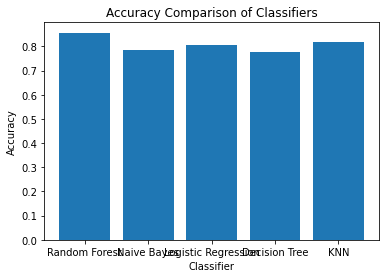

In [32]:
import matplotlib.pyplot as plt

# Accuracy values for each classifier
accuracy_values = [accuracy_rf, accuracy_nb, accuracy_lr, accuracy_dt, accuracy_knn]

# Classifier names
classifier_names = ['Random Forest', 'Naive Bayes', 'Logistic Regression', 'Decision Tree', 'KNN']

# Create the bar graph
plt.bar(classifier_names, accuracy_values)

# Customize the graph
plt.title("Accuracy Comparison of Classifiers")
plt.xlabel("Classifier")
plt.ylabel("Accuracy")

# Display the graph
plt.show()


## THE BEST WORKING MODEL FOR THIS DATASET IS RANDOM FOREST